<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](Code copied from 
https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980)

In [0]:
!pip install -U scikit-image

     |████████████████████████████████| 12.4MB 235kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [0]:
from skimage import data #to import sample data 
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


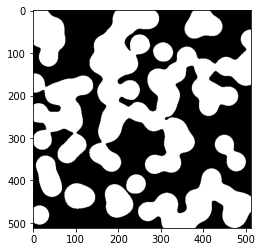

In [0]:
#importing grayscale image from skimage
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

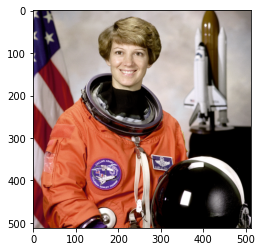

In [0]:
#importing colored image from skimage
image = data.astronaut()
plt.imshow(image,cmap='gray')

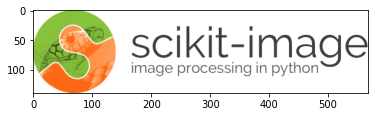

In [0]:
#Importing an image from an external source

image = io.imread('/content/logo.png')
plt.imshow(image);

In [0]:
#Loading multiple images
images = io.ImageCollection('/content/*.png:/content/*.jpg') 
print('Type:', type(images))
images.files


Type: <class 'skimage.io.collection.ImageCollection'>


['/content/Img1.png',
 '/content/Img2.jpg',
 '/content/Img3.jpg',
 '/content/Sharukh.jpg',
 '/content/logo.png']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [0]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2143138198>)

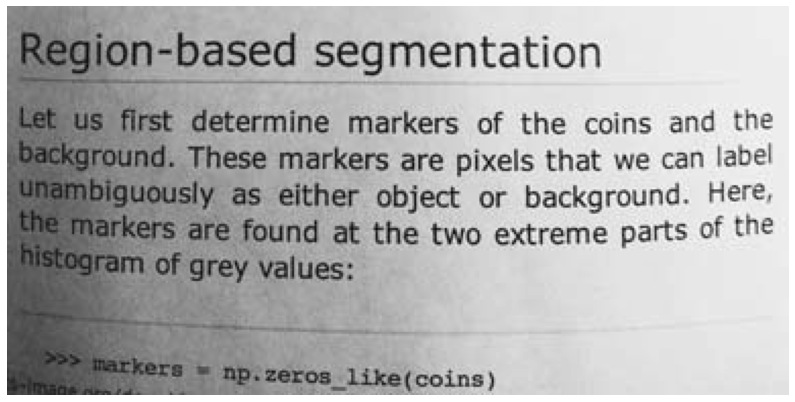

In [0]:
text = data.page()
image_show(text)

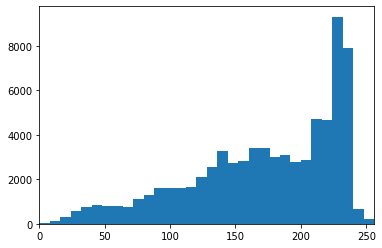

In [0]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

#x -axis shows
#Simply put, a histogram is a graph wherein the 
#x-axis shows all the values that are in the image 
#y-axis shows the frequency of those values.


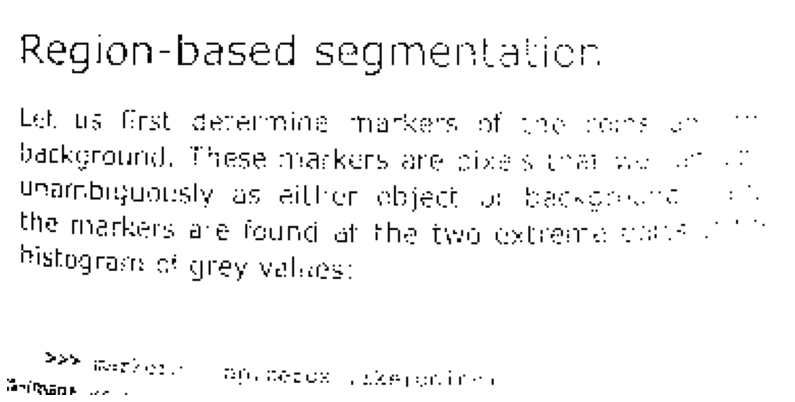

In [0]:
text_segmented = text>50
image_show(text_segmented);

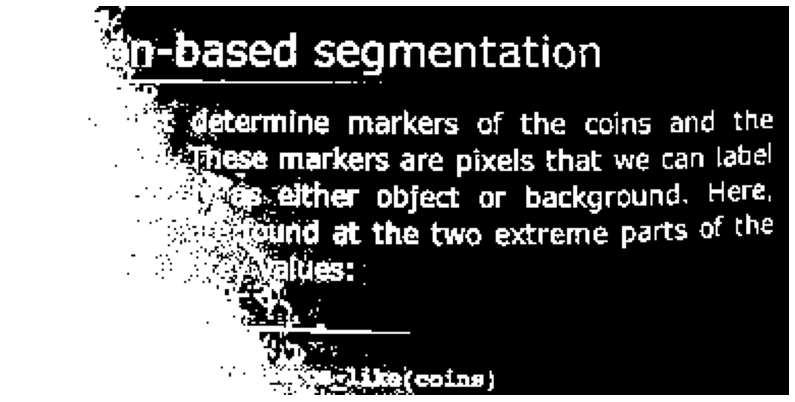

In [0]:
text_threshold = filters.threshold_otsu(text)  # Hit tab with the cursor after the underscore to get all the methods.
image_show(text < text_threshold);

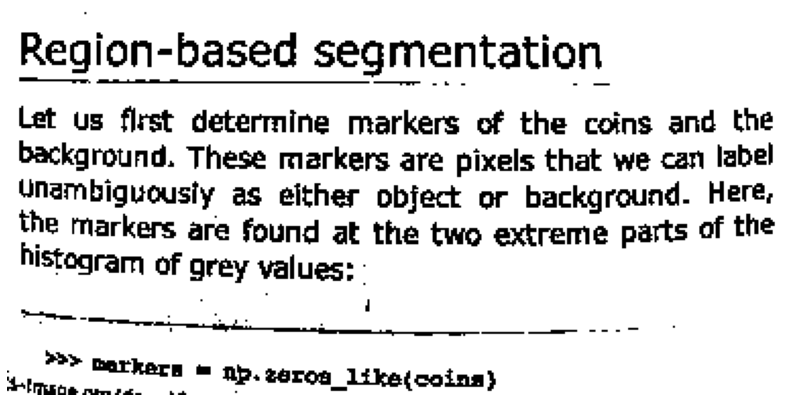

In [0]:

text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

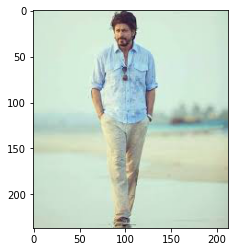

In [0]:
# import the image
from skimage import io
image = io.imread('/content/shah_small_standing.jpeg') 
plt.imshow(image);

(237, 212)

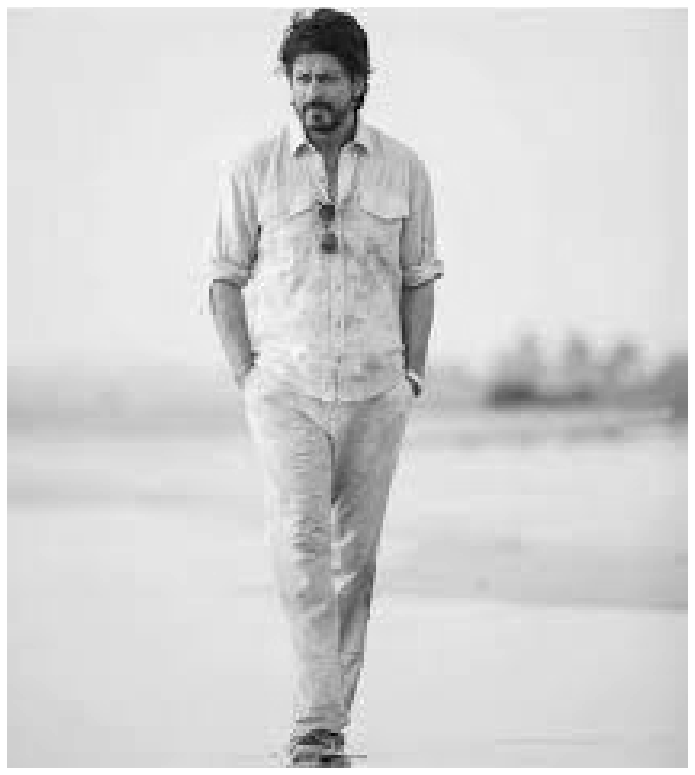

In [0]:
#covert to grayscale
image_gray = color.rgb2gray(image) 
image_show(image_gray);
image_gray.shape

[[1.20000000e+02 2.00000000e+01]
 [1.19990032e+02 2.06313710e+01]
 [1.19960137e+02 2.12621126e+01]
 [1.19910346e+02 2.18915962e+01]
 [1.19840707e+02 2.25191941e+01]
 [1.19751291e+02 2.31442809e+01]
 [1.19642186e+02 2.37662333e+01]
 [1.19513502e+02 2.43844315e+01]
 [1.19365366e+02 2.49982592e+01]
 [1.19197926e+02 2.56071046e+01]
 [1.19011350e+02 2.62103606e+01]
 [1.18805822e+02 2.68074261e+01]
 [1.18581549e+02 2.73977057e+01]
 [1.18338753e+02 2.79806112e+01]
 [1.18077676e+02 2.85555614e+01]
 [1.17798579e+02 2.91219832e+01]
 [1.17501740e+02 2.96793120e+01]
 [1.17187456e+02 3.02269923e+01]
 [1.16856038e+02 3.07644781e+01]
 [1.16507818e+02 3.12912337e+01]
 [1.16143142e+02 3.18067338e+01]
 [1.15762375e+02 3.23104648e+01]
 [1.15365895e+02 3.28019245e+01]
 [1.14954098e+02 3.32806229e+01]
 [1.14527395e+02 3.37460829e+01]
 [1.14086211e+02 3.41978404e+01]
 [1.13630985e+02 3.46354453e+01]
 [1.13162171e+02 3.50584613e+01]
 [1.12680237e+02 3.54664666e+01]
 [1.12185663e+02 3.58590547e+01]
 [1.116789

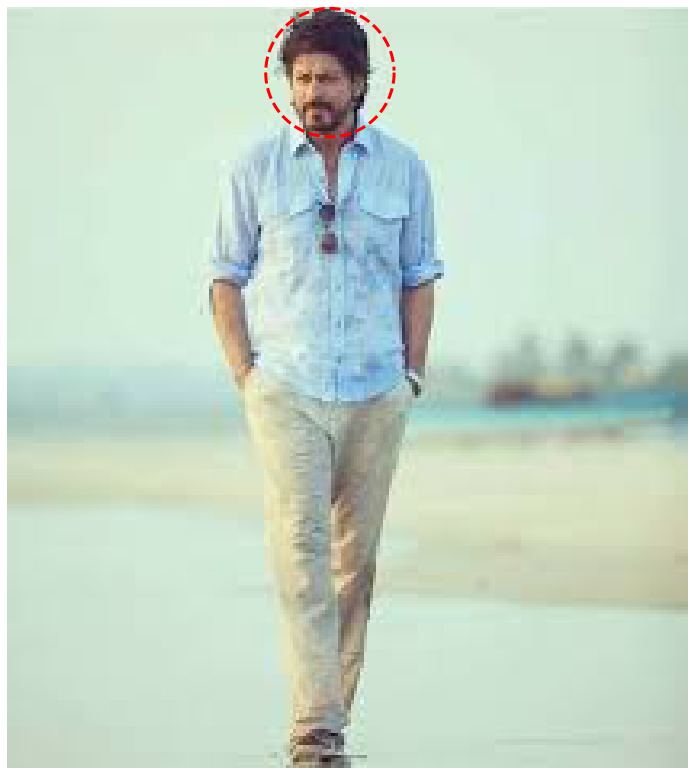

In [0]:
def circle_points(resolution, center, radius):
    """
    Generate points defining a circle on an image.
    """
    radians = np.linspace(0, 2*np.pi, resolution)

    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [20,100], 20)[:-1]
print(points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


(199, 2)
108.90630486560133


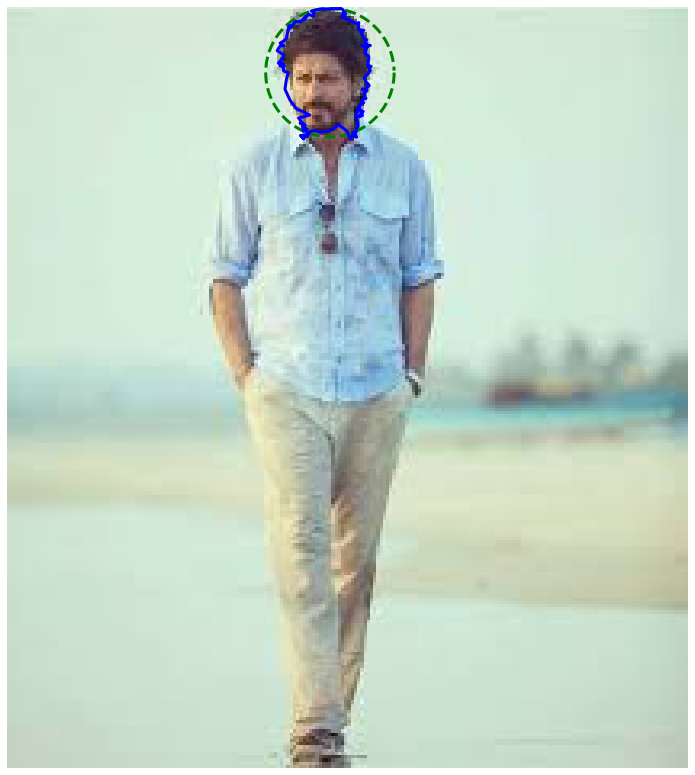

In [0]:
snake = seg.active_contour(image_gray, points)
print(snake.shape)
print(snake[20][0])

fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--g', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  """Entry point for launching an IPython kernel.


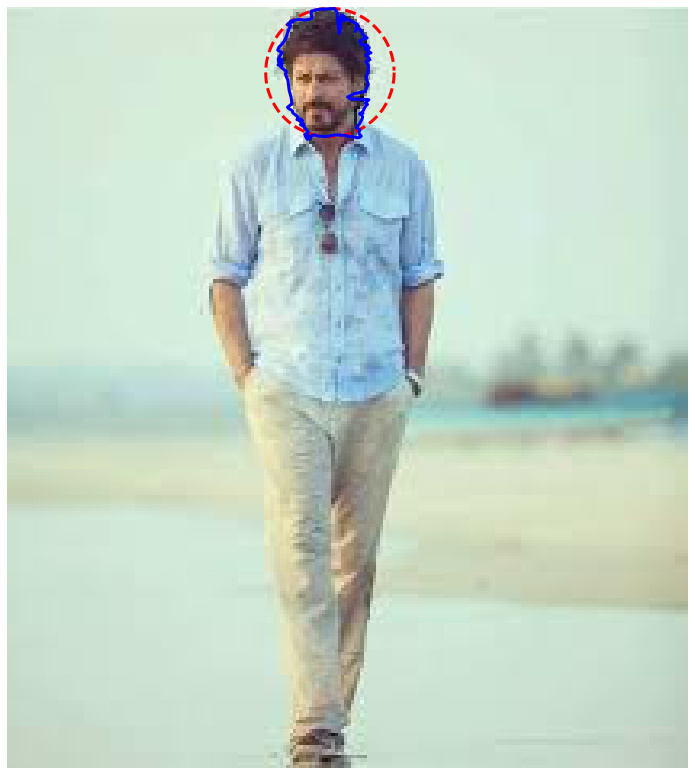

In [0]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

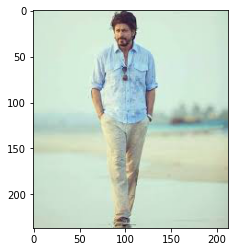

In [0]:
plt.imshow(image);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  # Remove the CWD from sys.path while we load stuff.


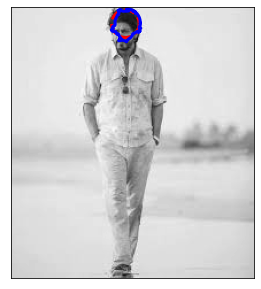

In [31]:
from skimage.filters import gaussian

r = np.linspace(80, 120, 50)
c = np.linspace(40, 20, 50)
init = np.array([r, c]).T
init = circle_points(200, [15,100], 12)[:-1]
#snake = seg.active_contour(gaussian(image_gray, 1), init,
                      #  alpha=.1, beta=1,
                      #  coordinates='rc')
snake = seg.active_contour(image_gray, init,alpha=0.5,beta=2,w_line=-1,w_edge=4,gamma=0.02)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(image_gray, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, image_gray.shape[1], image_gray.shape[0], 0])

plt.show()


In [22]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7])

print(arr[1:5])

print(arr[:,0])

[2 3 4 5]


IndexError: ignored

In [0]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
N = 8
y = [-0.04,-.03,-0.02,-0.01,0.,0.01,0.02,0.03]
print(y)
x1 = np.linspace(2, 10, N, endpoint=True)
print(x1)
#x2 = np.linspace(0, 10, N, endpoint=False)
plt.plot(x1, y, 'o')

#plt.plot(x2, y + 0.5, 'o')

#plt.ylim([-0.5, 1])

plt.show()